# APP SLI ***Quentin***
Merci de compléter le titre avec votre nom.
Pour l'utilisation des différentes fonction, voir le notebook Filtrage.Tuto.ipynb

## Observation et analyse du signal

Les données sont dans le fichier *co2.txt*

### Observation temporelle

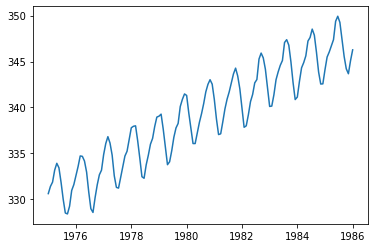

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import lfilter
import pandas as pd

x = np.loadtxt('co2.txt',skiprows=4)
t = np.linspace(1975, 1986, x.size)

# Votre code ici pour afficher le signal
plt.plot(t, x)
plt.show()

### Observation fréquentielle

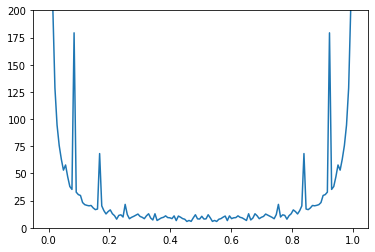

In [2]:
plt.plot(np.linspace(0, 1, 144), abs(np.fft.fft(x)))
plt.ylim(0, 200)
plt.show()

### Modèle mathématique et implémentation

[ 1.59168606e+00 -2.81328565e+03  2.92263944e+00  6.81293278e+00
 -1.04641645e+03]


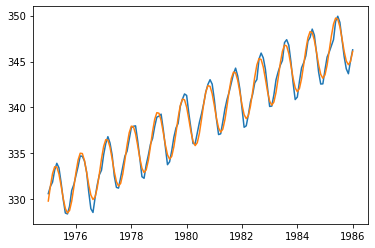

In [3]:
# Décrire rapidement votre modèle ici

def mod(t, a, b, c, w, p):
    """
    Model: 
        fonction affine + sinus
    """
    return a*t + b + c*np.sin(w*t + p)


# Implémentation du modèle et comparaison avec le signal d'origine

fit_params = list(curve_fit(mod, t, x, p0=(1.5, 330-1.5*1976, 2.5, 2*np.pi, np.pi), maxfev=1_000_000_000))[0]

print(fit_params)
fit = lambda t: mod(t, *fit_params)

plt.plot(t, x)
plt.plot(t, fit(t))
plt.show()

Sans les ossillations on a donc :

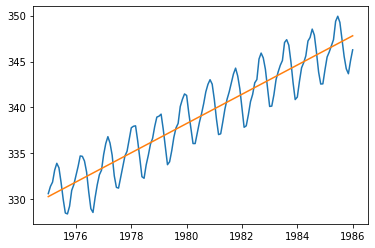

In [4]:
plt.plot(t, x)
plt.plot(t, fit_params[0]*t + fit_params[1])
plt.show()

## Implémentation des solutions proposées

### Méthode directe avec boucles


1. 𝑦(𝑛)=(2𝑃+1)−1∑𝑥𝑃𝑝=−𝑃(𝑛+𝑝)avec P pris entre 10 et 30
2. 𝑦(𝑛)=𝑀−1∑𝑥𝑀−1𝑝=0(𝑛−𝑝)avec M pris entre 10 et 20.
3. 𝑦(𝑛)=0.95𝑦(𝑛−1)+0.05𝑥(𝑛)

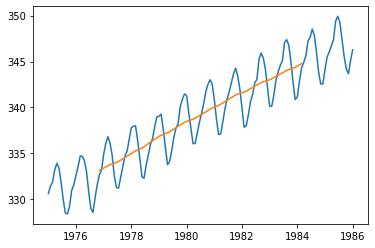

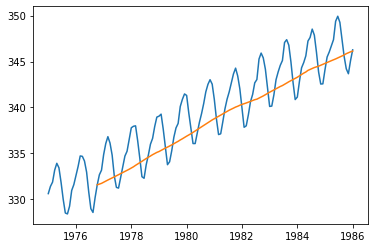

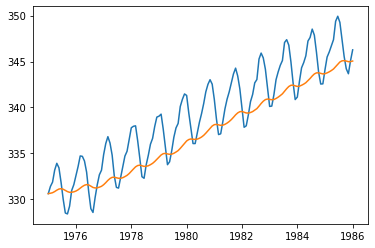

In [5]:
# Traitement 1
P = 24

plt.plot(t, x)
plt.plot(t, pd.Series(x).rolling(2*P+1, center=True).mean())
plt.show()


# Traitement 2
M = 24

plt.plot(t, x)
plt.plot(t, pd.Series(x).rolling(M).mean())
plt.show()


# Traitement 3
a = 0.05

plt.plot(t, x)
plt.plot(t, pd.Series(x).ewm(alpha=a, adjust=False).mean())
plt.show()

### Méthode avec `lfilt`

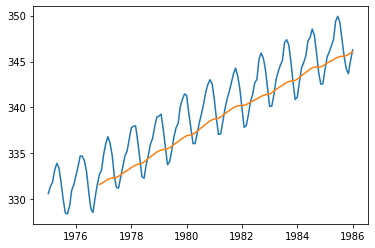

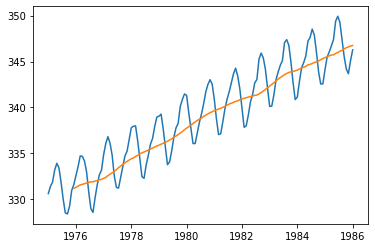

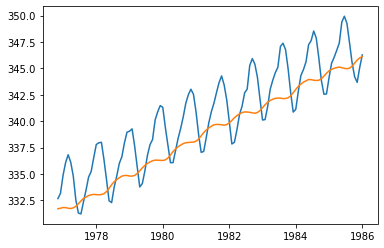

In [6]:
# Traitement 1
P = 12

plt.plot(t, x)
plt.plot(t[M:], lfilter(x=x, a=1, b=np.ones(2*P+1)/(2*P+1))[M:])
plt.show()


# Traitement 2
M = 12

plt.plot(t, x)
plt.plot(t[M:], lfilter(x=x, a=1, b=np.ones(M)/M)[M:])
plt.show()


# Traitement 3
a = 0.95

plt.plot(t[24:], x[24:])
plt.plot(t[24:], lfilter(x=x, a=1, b=a**np.arange(0, -24, -1)/(a**np.arange(0, -24, -1)).sum())[24:])
plt.show()

### Méthode avec `convolve`
Nécessite un peu de calcul

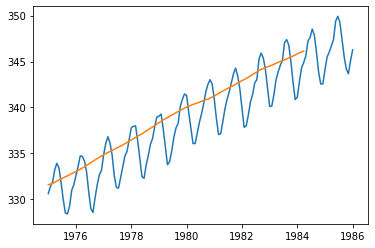

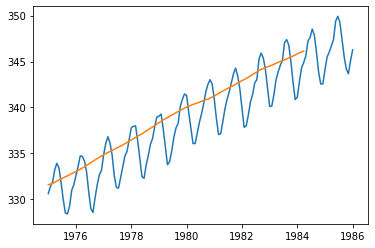

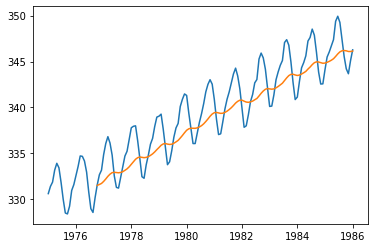

In [7]:
# Traitement 1
P = 24

door = np.ones(P)/P


plt.plot(t, x)
plt.plot(t[:145-P], np.convolve(x, door)[P-1:-P+1])
plt.show()
# Traitement 2
M = 24

door = np.ones(M)/M


plt.plot(t, x)
plt.plot(t[:145-P], np.convolve(x, door)[P-1:-P+1])
plt.show()

# Traitement 3
a = 0.95

door = a**np.arange(0, 24)/(a**np.arange(0, 24)).sum()


plt.plot(t, x)
plt.plot(t[23:], np.convolve(x, door)[23:-23])
plt.show()

### Estimation de $y(100)$

Comme vus précedement, il y a des variations saisonieres des concentrations en $CO_2$ dues a ses multiples sources [[1]](https://sci-hub.st/https://doi.org/10.1029/JB091iB12p12177), [[2]](https://sci-hub.st/https://doi.org/10.1111/j.1365-3180.1977.tb00454.x), [[3]](https://sci-hub.st/https://doi.org/10.1111/j.1365-2486.1995.tb00011.x).

De plus on sait depuis de nombreuses années que l'augmentation de la concentration en $CO_2$ vas induire une augmentation de température[[4]](https://climat.be/doc/181008_IPCC_sr15_spm.pdf). Cependant cette augmentation de température induit elle aussi une augmentation de $CO_2$ [[5]](https://sci-hub.st/https://doi.org/10.1016/0038-0717(93)90008-Y).

Un simple modèle linéaire risque de ne pas être très précis, ajoutons une courbe exponentielle (pour lambda petit, equivalent a une fonction linéaire).

[ 4.23275620e+04  3.75961026e-05 -4.19972671e+04  2.92263986e+00
  6.81293615e+00 -1.65205804e-01]


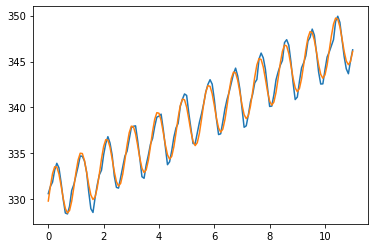

In [8]:
# Donner ci-dessous votre méthode pour estimer la meilleure valeur possible de y(100)

t2 = np.linspace(0, 11, x.size)

def mod2(t, a, lam, b, c, w, p):
    """
    Model: 
        fonction expo + sinus
    """
    return a*np.exp(lam*t) + b + c*np.sin(w*t + p)


# Implémentation du modèle et comparaison avec le signal d'origine

fit_params2 = list(curve_fit(mod2, t2, x, p0=(160, 0.01, 170, 2.5, 2*np.pi, np.pi), maxfev=1_000_000_000))[0]

print(fit_params2)
fit2 = lambda t: mod2(t, *fit_params2)

plt.plot(t2, x)
plt.plot(t2, fit2(t2))
plt.show()

Retitrons les oscillations et faisons un forecast :

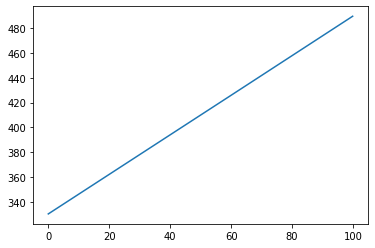

In [9]:
t3 = np.arange(0, 100, 1/12)
def mod3(t, a, lam, b, c, w, p):
    """
    Model: 
        fonction affine
    """
    return a*np.exp(lam*t) + b

fit3 = lambda t: mod3(t, *fit_params2)

plt.plot(t3, fit3(t3))
plt.show()

En fin de compte le $\lambda$ est si petit qu'on ne voit qu'une fonction exponentielle (meme a echelle 100 ans).

## Solution de l'APP

Mettre ici une synthèse de votre choix pour les paramètres et le traitement. On poura regarder les réponses en fréquence des filtres.

Comme on a pus le voir, `curve_fit` fonctionne toujours aussi bien, le fenêtrage doit forcément etre un module de 12 pour la SMA et l'EMA ne parait pas très addapté pour ce cas, en effet, le signal a filtrer est assez facilement descriptible mathématiquement et l'utilisation de `curve_fit` dans ces conditions est très pratique:
Le bruit restant est il purement normal ?

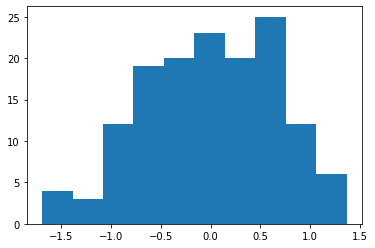

In [10]:
plt.hist(x - fit2(t2))
plt.show()

Ou encore pour étudier la saisonalité :

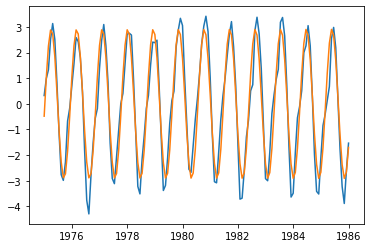

In [11]:
def mod_sin(t, a, b, c, w, p):
    """
    Model: 
        sinus
    """
    return c*np.sin(w*t + p)

def mod_lin(t, a, b, c, w, p):
    """
    Model: 
        fonction affine
    """
    return a*t + b

plt.plot(t, x - mod_lin(t, *fit_params))
plt.plot(t, mod_sin(t, *fit_params))
plt.show()

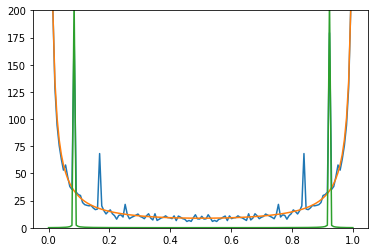

In [12]:
nu = np.linspace(0,1,144)

plt.plot(nu, abs(np.fft.fft(x)))
plt.plot(nu, abs(np.fft.fft(mod_lin(t, *fit_params))))
plt.plot(nu, abs(np.fft.fft(mod_sin(t, *fit_params))))
plt.ylim(0, 200)
plt.show()

Tiens tiens tiens...

On a loupé quelque chose...

Je dirais 2 autres sinus preriodiquement répartis avec une division de l'amplitude par 2...

On vas essayer de fit sur fourier et on verra bien.

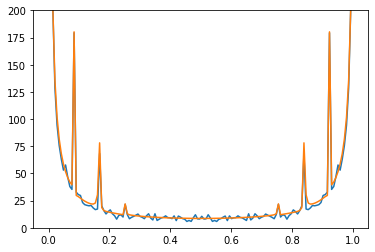

In [13]:
# Addaptation de p0

plt.plot(nu, abs(np.fft.fft(x)))
plt.plot(nu, abs(np.fft.fft(1.6*t -2813 + 2.9*np.sin(6.8*t + np.pi) + 1.2*np.sin(13.5*t + np.pi)+0.3*np.sin(20.5*t + np.pi))))

plt.ylim(0, 200)
plt.show()

In [14]:
exp = abs(np.fft.fft(x))

def mod_f(t, a, b, c1, w1, c2, w2, c3, w3):
    """
    Model: 
        fonction affine + 3 sinus
    """
    return abs(np.fft.fft(a*t + b + c1*np.sin(w1*t + np.pi) + c2*np.sin(w2*t + np.pi) + c3*np.sin(w3*t + np.pi)))


# Implémentation du modèle et comparaison avec le signal d'origine

fit_params_f = list(curve_fit(mod_f, t, exp, p0=(
    1.5, 330-1.5*1976, # Ax+B
    2.9, 6.8,          # SIN 1
    1.2, 13.5,         # SIN 2
    0.3, 20.5,         # SIN 3
), maxfev=1_000_000_000))[0]

print(fit_params_f)

[ 1.58938434e+00 -2.80873914e+03  2.45469354e+00  6.79949769e+00
  9.02070051e-01  1.34997560e+01  2.78906767e-01  2.05000003e+01]


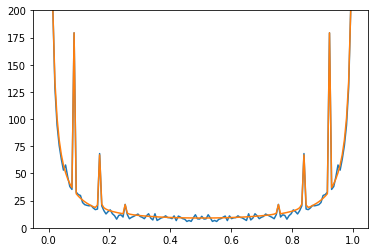

In [15]:
plt.plot(nu, exp)
plt.plot(nu, mod_f(t, *fit_params_f))
plt.ylim(0, 200)
plt.show()

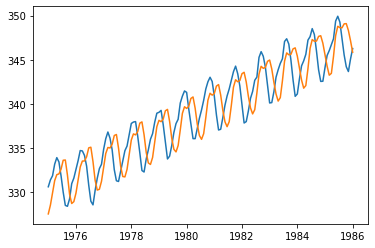

In [17]:
def mod_f_t(t, a, b, c1, w1, c2, w2, c3, w3):
    """
    Model: 
        fonction affine + 3 sinus
    """
    return a*t + b + c1*np.sin(w1*t + np.pi) + c2*np.sin(w2*t + np.pi) + c3*np.sin(w3*t + np.pi)

plt.plot(t, x)
plt.plot(t, mod_f_t(t, *fit_params_f))
plt.show()

Ok c'est qu'il manque des points donc on mange du signal triangle...

Restons sur le premier modele de la troisieme cellule de code qui est décidément le meilleur...